<a href="https://colab.research.google.com/github/AnitaAki/akicreate/blob/main/%22Home_Loan_Prediction_Exploring_Traditional_and_Automated_Machine_Learning_Techniques%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
# Step 1: Import the pandas library
import pandas as pd

# Step 2: Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Step 3: Display the first few rows of each dataset
print("Training Data:")
print(train_df.head())
print("\nTesting Data:")
print(test_df.head())


Training Data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2    

In [ ]:
# Explore the training dataset
print("Training Data Summary:")
print(train_df.info())
print(train_df.describe())

# Explore the testing dataset
print("\nTesting Data Summary:")
print(test_df.info())
print(test_df.describe())


Training Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count    

In [23]:
# Fill missing values - for example:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)


<ipython-input-23-5afeec430e97>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
<ipython-input-23-5afeec430e97>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
# Replace 0 with NULL in CoapplicantIncome
train_df['CoapplicantIncome'] = train_df['CoapplicantIncome'].replace(0, pd.NA)

# Adjust LoanAmount from thousands
train_df['LoanAmount'] = train_df['LoanAmount'] * 1000
test_df['LoanAmount'] = test_df['LoanAmount'] * 1000


In [ ]:
# Change Loan_ID to string
train_df['Loan_ID'] = train_df['Loan_ID'].astype(str)
test_df['Loan_ID'] = test_df['Loan_ID'].astype(str)


In [25]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Separate features and target variable
X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_df['Loan_Status'].map({'Y': 1, 'N': 0})  # Encode Loan_Status as 1 and 0

# Split the data into training and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


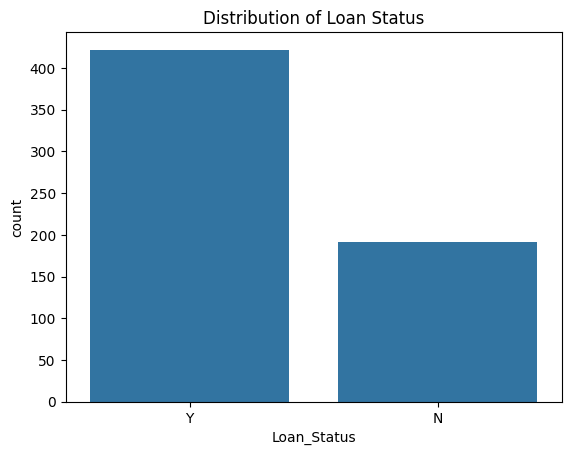

In [ ]:
# Distribution of Loan Status
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Status')
plt.show()


<ipython-input-2-92474380cf5f>:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)


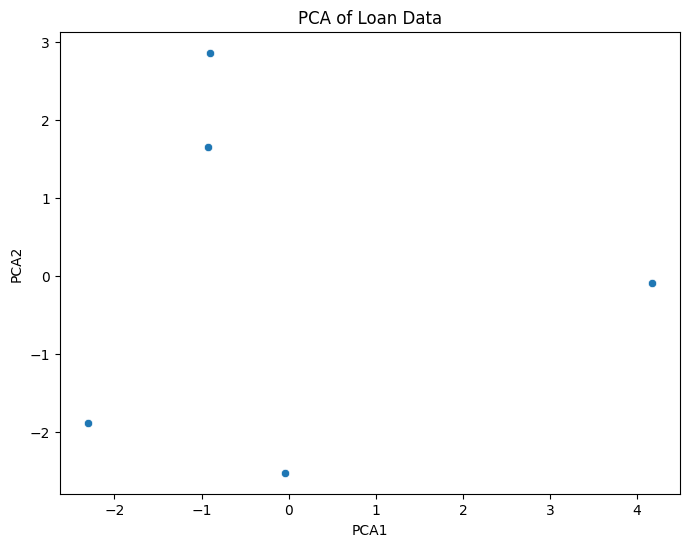

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual DataFrame if different)
data = {
    'Loan_ID': ['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008'],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male'],
    'Married': ['No', 'Yes', 'Yes', 'Yes', 'No'],
    'Dependents': [0, 1, 0, 0, 0],
    'Education': ['Graduate', 'Graduate', 'Graduate', 'Not Graduate', 'Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
    'ApplicantIncome': [5849, 4583, 3000, 2583, 6000],
    'CoapplicantIncome': [0.0, 1508.0, 0.0, 2358.0, 0.0],
    'LoanAmount': [np.nan, 128.0, 66.0, 120.0, 141.0],
    'Loan_Amount_Term': [360.0, 360.0, 360.0, 360.0, 360.0],
    'Credit_History': [1.0, 1.0, 1.0, 1.0, 1.0],
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Urban', 'Urban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'Y']
}

# Create the DataFrame
train_df = pd.DataFrame(data)

# Fill missing values for LoanAmount as an example (necessary before scaling)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)

# Convert categorical columns to numerical format using one-hot encoding
train_df_encoded = pd.get_dummies(train_df, drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_df_encoded)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components for visualization
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

# Visualize the PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2')
plt.title('PCA of Loan Data')
plt.show()


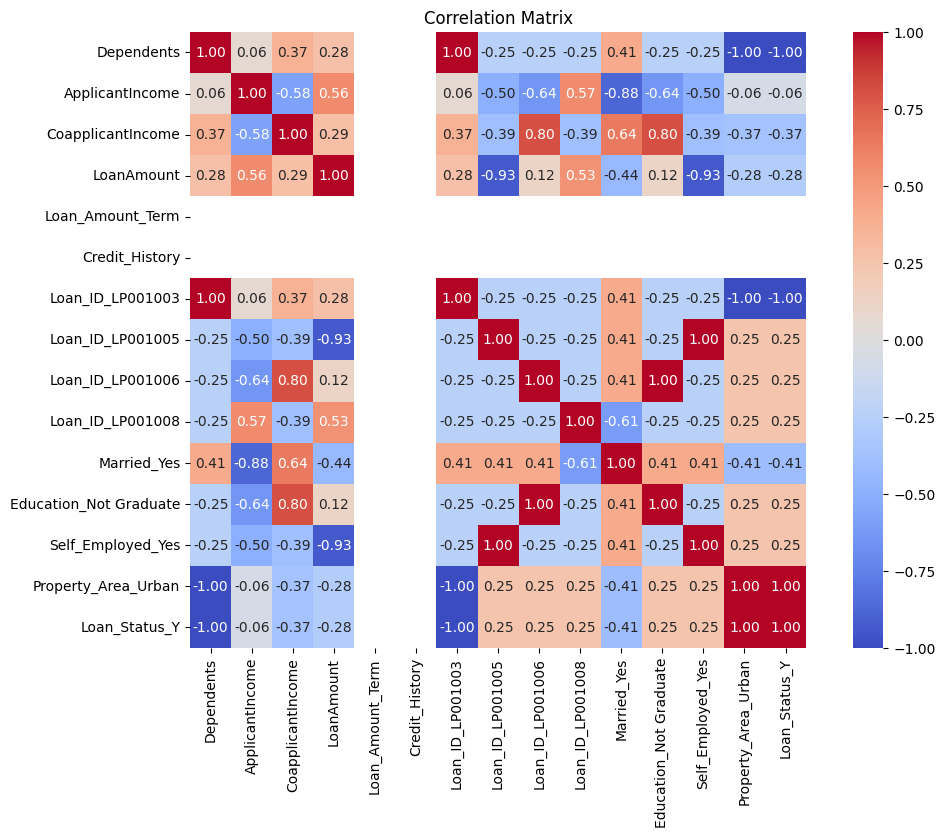

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = train_df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [4]:
# Import necessary libraries
import numpy as np

# Calculate Z-scores for ApplicantIncome and LoanAmount
train_df_encoded['Income_Zscore'] = (train_df_encoded['ApplicantIncome'] - train_df_encoded['ApplicantIncome'].mean()) / train_df_encoded['ApplicantIncome'].std()
train_df_encoded['Loan_Zscore'] = (train_df_encoded['LoanAmount'] - train_df_encoded['LoanAmount'].mean()) / train_df_encoded['LoanAmount'].std()

# Identify outliers (z-score > 3 or < -3)
outliers_income = train_df_encoded[train_df_encoded['Income_Zscore'].abs() > 3]
outliers_loan = train_df_encoded[train_df_encoded['Loan_Zscore'].abs() > 3]

print("Outliers in ApplicantIncome:", outliers_income)
print("Outliers in LoanAmount:", outliers_loan)



Outliers in ApplicantIncome: Empty DataFrame
Columns: [Dependents, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Loan_ID_LP001003, Loan_ID_LP001005, Loan_ID_LP001006, Loan_ID_LP001008, Married_Yes, Education_Not Graduate, Self_Employed_Yes, Property_Area_Urban, Loan_Status_Y, Income_Zscore, Loan_Zscore]
Index: []
Outliers in LoanAmount: Empty DataFrame
Columns: [Dependents, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Loan_ID_LP001003, Loan_ID_LP001005, Loan_ID_LP001006, Loan_ID_LP001008, Married_Yes, Education_Not Graduate, Self_Employed_Yes, Property_Area_Urban, Loan_Status_Y, Income_Zscore, Loan_Zscore]
Index: []


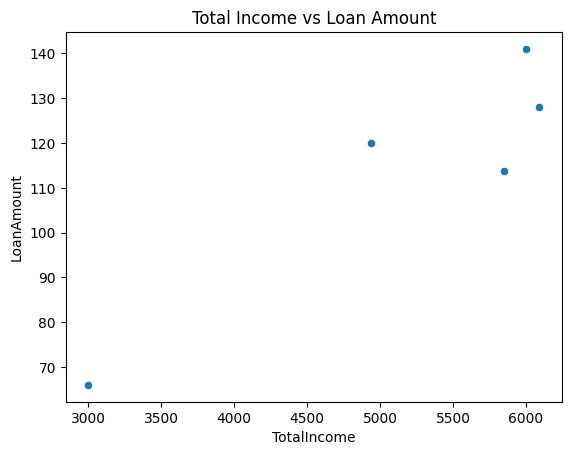

In [5]:
# Create TotalIncome as a new feature
train_df_encoded['TotalIncome'] = train_df_encoded['ApplicantIncome'] + train_df_encoded['CoapplicantIncome']

# Visualize TotalIncome vs. LoanAmount
sns.scatterplot(x='TotalIncome', y='LoanAmount', data=train_df_encoded)
plt.title("Total Income vs Loan Amount")
plt.show()


In [6]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Impute missing values
train_df_encoded_imputed = pd.DataFrame(imputer.fit_transform(train_df_encoded), columns=train_df_encoded.columns)

print("Missing values handled using KNNImputer.")


Missing values handled using KNNImputer.


Dataset Shape: (5, 18)

Missing Values:
 Dependents                0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Loan_ID_LP001003          0
Loan_ID_LP001005          0
Loan_ID_LP001006          0
Loan_ID_LP001008          0
Married_Yes               0
Education_Not Graduate    0
Self_Employed_Yes         0
Property_Area_Urban       0
Loan_Status_Y             0
Income_Zscore             0
Loan_Zscore               0
TotalIncome               0
dtype: int64

Data Types:
 Dependents                  int64
ApplicantIncome             int64
CoapplicantIncome         float64
LoanAmount                float64
Loan_Amount_Term          float64
Credit_History            float64
Loan_ID_LP001003             bool
Loan_ID_LP001005             bool
Loan_ID_LP001006             bool
Loan_ID_LP001008             bool
Married_Yes                  bool
Education_Not Graduate       bool
Self_Employed_Yes   

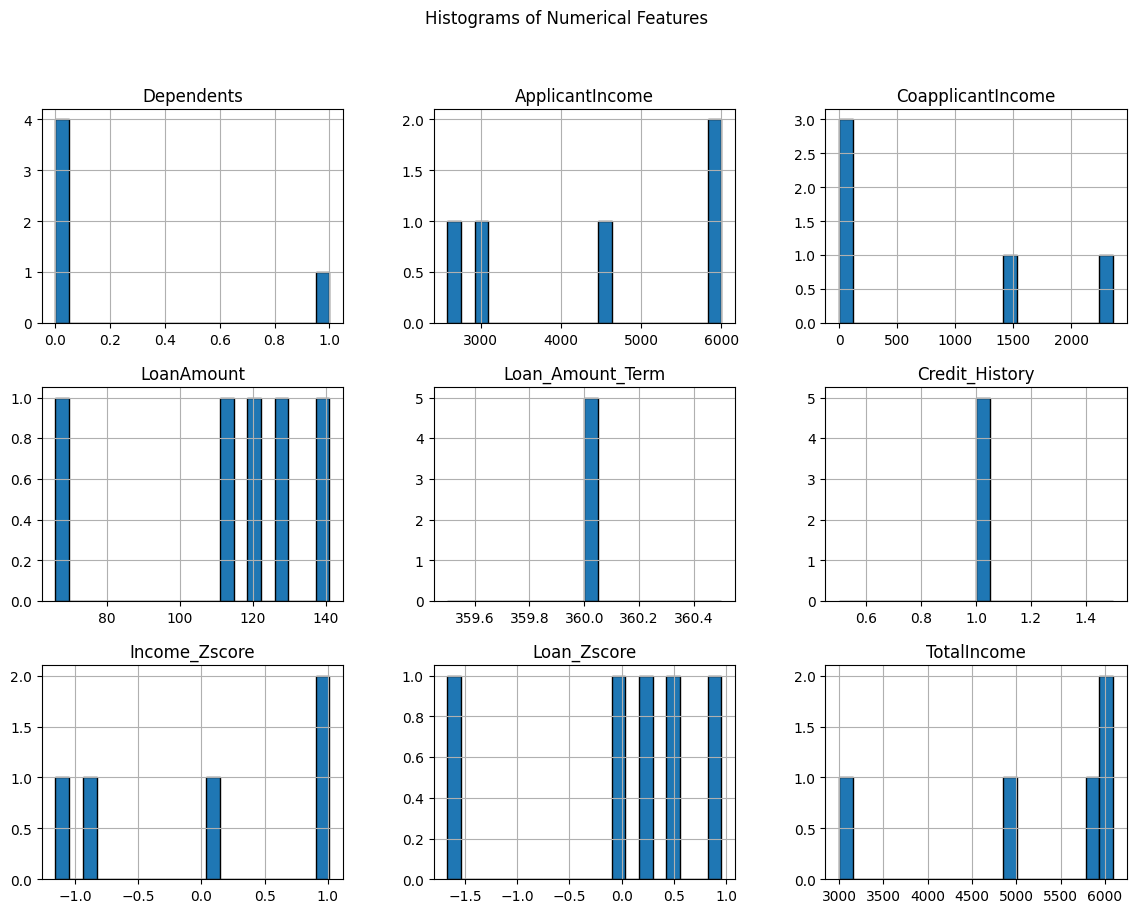

In [8]:
def quick_eda(df):
    print("Dataset Shape:", df.shape)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nData Types:\n", df.dtypes)
    print("\nSummary Statistics:\n", df.describe())
    print("\nCorrelation Matrix:\n", df.corr())

    # Plot distribution of numeric columns
    df.hist(bins=20, figsize=(14,10), edgecolor='black')
    plt.suptitle('Histograms of Numerical Features')
    plt.show()

quick_eda(train_df_encoded)


In [10]:
# Check the column names to verify 'Loan_Status' is present
print("Columns in DataFrame:", train_df_encoded.columns)

# If the column name appears correct, check for any missing values or inspect a sample of data
print(train_df_encoded.head())


Columns in DataFrame: Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_ID_LP001003',
       'Loan_ID_LP001005', 'Loan_ID_LP001006', 'Loan_ID_LP001008',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Urban', 'Loan_Status_Y', 'Income_Zscore', 'Loan_Zscore',
       'TotalIncome'],
      dtype='object')
   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0             5849                0.0      113.75   
1           1             4583             1508.0      128.00   
2           0             3000                0.0       66.00   
3           0             2583             2358.0      120.00   
4           0             6000                0.0      141.00   

   Loan_Amount_Term  Credit_History  Loan_ID_LP001003  Loan_ID_LP001005  \
0             360.0             1.0             False             False   
1             360.0             1.0  

In [16]:
print(train_df[['Loan_Status']].head())


  Loan_Status
0           Y
1           N
2           Y
3           Y
4           Y


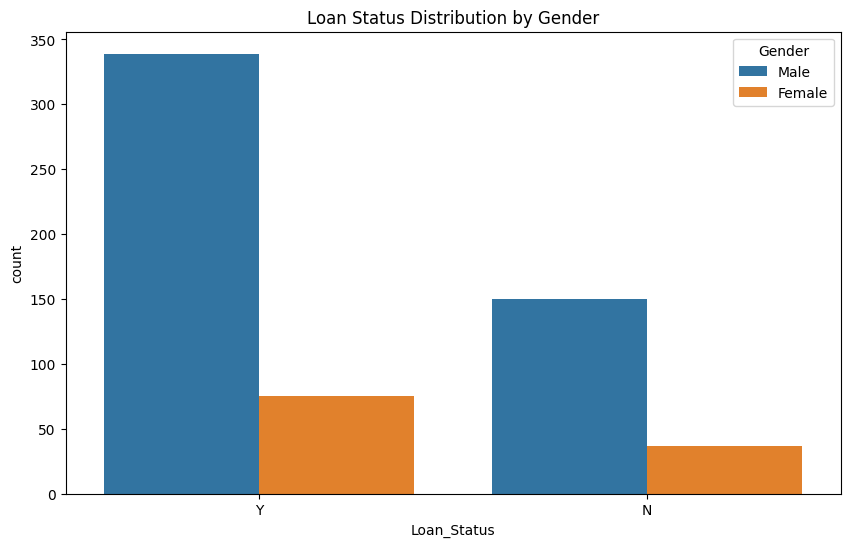

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Loan_Status distribution across Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Loan_Status', hue='Gender')
plt.title('Loan Status Distribution by Gender')
plt.show()




In [19]:
# Create a new feature 'TotalIncome'
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']


In [20]:
# Target encoding for categorical columns with respect to 'Loan_Status'
target_map = {'Y': 1, 'N': 0}
train_df['Loan_Status'] = train_df['Loan_Status'].map(target_map)
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    means = train_df.groupby(col)['Loan_Status'].mean()
    train_df[col] = train_df[col].map(means)
